Removes duplicate entries in the Annotation dataset

Note that there are two duplicate entries in the Gold Standard Dataset

In [1]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

sns.set(context="talk", style="darkgrid")

# load the dataframe

In [2]:
CWD = os.getcwd()
folder = "data"
file = "Annotationen-Stufe-2.txt"

path = "/".join( (CWD, folder, file) )

df = pd.read_csv(path, index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "Stärkegrad (A, B, C)",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]

df["Metapher"] = (df["Metapher?"] == "Metapher").astype(int)
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat").astype(int)
df["Nein"] = 0
df.drop("Metapher?", axis=1, inplace = True)
df

,Textstelle,Fokus,Rahmen,Begründung/Kommentar,Annotator,Metapher,Kandidat,Nein
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,Fachausdruck,B,0,1,0
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1,0
...,...,...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,B,0,1,0
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",einer turmhohen Mauer,Schutzzöllen,NaN,B,1,0,0
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,mütterlichen Päppelflasche,Sie,NaN,B,1,0,0
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,B,0,1,0


In [3]:
# example of several occurances
stelle = "Der politische Körper verwendet in beiden Fällen seine meiste Kraft"
stelle +=" auf die Zunahme von Zähnen und Krallen."
clms = ["Textstelle", "Annotator", "Metapher", "Kandidat"]
df.loc[ [stelle in text for text in df["Textstelle"]], clms]

,Textstelle,Annotator,Metapher,Kandidat
378,"""Der politische Körper verwendet in beiden Fä...",B,1,0
958,"""Der politische Körper verwendet in beiden Fä...",K,1,0
1406,"""Der politische Körper verwendet in beiden Fä...",A,0,1


In [4]:
file = "Annotationen-Stufe-2-GoldStandard.csv"

path = "/".join( (CWD, folder, file) )



gold = pd.read_csv(path, index_col = 0)
gold.drop(["Filename"], axis=1, inplace=True)
gold["Begründung/Kommentar"] = np.nan
gold.drop_duplicates(inplace=True) # There are 2 duplicates... But they have the same label, so its ok
gold

,Textstelle,Metapher?,Fokus,Rahmen,Annotator,Begründung/Kommentar
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN,GoldStandard,NaN
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN,GoldStandard,NaN
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN
...,...,...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']",GoldStandard,NaN
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN


In [5]:
gold["Metapher"] = (gold["Metapher?"] == "Metapher").astype(int)
gold["Kandidat"] = (gold["Metapher?"] == "Metaphernkandidat").astype(int)
gold["Nein"] = (gold["Metapher?"] == "Nein").astype(int)
#gold.drop("Metapher?", axis=1, inplace = True)
#gold = gold[df.columns]
gold

,Textstelle,Metapher?,Fokus,Rahmen,Annotator,Begründung/Kommentar,Metapher,Kandidat,Nein
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN,GoldStandard,NaN,1,0,0
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN,GoldStandard,NaN,1,0,0
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']",GoldStandard,NaN,1,0,0
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN,0,1,0


In [6]:
np.isin(gold.Textstelle, df.Textstelle).mean()

1.0

In [7]:
np.isin(df.Textstelle, gold.Textstelle).mean().round(3)

0.851

# Merge the two dataset

In [8]:
df = pd.concat([df, gold[df.columns]])
df

,Textstelle,Fokus,Rahmen,Begründung/Kommentar,Annotator,Metapher,Kandidat,Nein
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,Fachausdruck,B,0,1,0
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1,0
...,...,...,...,...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,GoldStandard,0,1,0
654,"Die Amerikaner folgern, da sie alle Rohmateria...","['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']",NaN,GoldStandard,1,0,0
655,Sie könne bei ihrer jetzigen großen Kraft und ...,NaN,NaN,NaN,GoldStandard,0,1,0
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,GoldStandard,0,1,0


# Groupby Textstelle

In [9]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat", "Nein"]].sum()
data

,Metapher,Kandidat,Nein
Textstelle,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",3,1,0
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,4,0
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,4,0
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,3,0
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,4,0
...,...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,4,0
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,3,0
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",3,1,0


In [10]:
data = data.merge(gold[["Textstelle", "Metapher?"]], on="Textstelle", how="left")
data

,Textstelle,Metapher,Kandidat,Nein,Metapher?
0,"""Der politische Körper verwendet in beiden Fä...",3,1,0,Metapher
1,"""Immer noch wird durch die protestantische Le...",0,4,0,Metaphernkandidat
2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,4,0,Metaphernkandidat
3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,3,0,Metaphernkandidat
4,"""Solange das Menschengeschlecht seinen Zerstö...",0,4,0,Metaphernkandidat
...,...,...,...,...,...
801,verlaufs; sie hat Naturforschung in dem von un...,0,4,0,Metaphernkandidat
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,3,0,Metaphernkandidat
803,wenn wir von dem schlechten Worte »Rechtsphilo...,3,1,0,Metapher
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,0,NaN


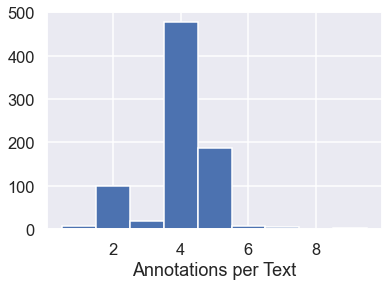

In [11]:
data[["Metapher", "Kandidat"]].sum(axis=1).hist(bins = np.arange(0,10,1)+0.5);
#plt.yscale("log")
plt.xlabel("Annotations per Text");

In [12]:
erklärung = df.groupby(["Textstelle"])[["Fokus", "Rahmen", "Annotator"]].agg(pd.Series.tolist)
erklärung

,Fokus,Rahmen,Annotator
Textstelle,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""","[Zähnen und Krallen, Zähnen und Krallen, nan, ...","[der politische Körper, der politische Körper,...","[B, K, A, GoldStandard]"
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""","[nan, Stoffwelt, verzwergt und entkleidet, nan...","[nan, unser praktisches Ideal, nan, nan]","[B, K, A, GoldStandard]"
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
...,...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[T, P, B, GoldStandard]"
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.","[nan, nan, verstellbare Puppen, nan]","[nan, nan, staatliche Menschenverhältnisse, nan]","[P, K, B, GoldStandard]"
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.","[schwindsüchtig ist, nan, schwindsüchtig, ['sc...","[daß eine Philosophie, nan, eine Philosophie, ...","[P, K, B, GoldStandard]"


In [13]:
data = data.merge(erklärung, on = "Textstelle")
data.reset_index(inplace = True)
data["orig"] = data.Textstelle
data

,index,Textstelle,Metapher,Kandidat,Nein,Metapher?,Fokus,Rahmen,Annotator,orig
0,0,"""Der politische Körper verwendet in beiden Fä...",3,1,0,Metapher,"[Zähnen und Krallen, Zähnen und Krallen, nan, ...","[der politische Körper, der politische Körper,...","[B, K, A, GoldStandard]","""Der politische Körper verwendet in beiden Fä..."
1,1,"""Immer noch wird durch die protestantische Le...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Immer noch wird durch die protestantische Le..."
2,2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Kein Zweifel"", schreibt Alb. Schaeffle 1), v..."
3,3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,3,0,Metaphernkandidat,"[nan, Stoffwelt, verzwergt und entkleidet, nan...","[nan, unser praktisches Ideal, nan, nan]","[B, K, A, GoldStandard]","""Mit je weiterem Blick wir die Stoffwelt zu ü..."
4,4,"""Solange das Menschengeschlecht seinen Zerstö...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Solange das Menschengeschlecht seinen Zerstö..."
...,...,...,...,...,...,...,...,...,...,...
801,801,verlaufs; sie hat Naturforschung in dem von un...,0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[T, P, B, GoldStandard]",verlaufs; sie hat Naturforschung in dem von un...
802,802,wenn wir uns ein Prinzip denken und auf Grund ...,1,3,0,Metaphernkandidat,"[nan, nan, verstellbare Puppen, nan]","[nan, nan, staatliche Menschenverhältnisse, nan]","[P, K, B, GoldStandard]",wenn wir uns ein Prinzip denken und auf Grund ...
803,803,wenn wir von dem schlechten Worte »Rechtsphilo...,3,1,0,Metapher,"[schwindsüchtig ist, nan, schwindsüchtig, ['sc...","[daß eine Philosophie, nan, eine Philosophie, ...","[P, K, B, GoldStandard]",wenn wir von dem schlechten Worte »Rechtsphilo...
804,804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,0,NaN,"[nan, nan]","[nan, nan]","[P, B]","»Die Macht, die das Kabinett hat, auf die vers..."


# Embedd all Textstellen and compare the leftovers to existing ones by using cosine

In [14]:
from sentence_transformers import SentenceTransformer

model_name = "distiluse-base-multilingual-cased-v2"

model = SentenceTransformer(model_name)

In [15]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

sentences = data.Textstelle

X = model.encode(sentences)

M = 1-pairwise_distances(X, metric="cosine")
M

array([[ 1.        ,  0.08989334,  0.1378982 , ...,  0.12552172,
         0.33805943,  0.11936927],
       [ 0.08989334,  1.        ,  0.1750071 , ...,  0.2041781 ,
         0.12382299,  0.04537559],
       [ 0.1378982 ,  0.1750071 ,  1.        , ...,  0.15821826,
         0.22007948, -0.0013454 ],
       ...,
       [ 0.12552172,  0.2041781 ,  0.15821826, ...,  1.        ,
        -0.00357687,  0.02381539],
       [ 0.33805943,  0.12382299,  0.22007948, ..., -0.00357687,
         1.        ,  0.11389446],
       [ 0.11936927,  0.04537559, -0.0013454 , ...,  0.02381539,
         0.11389446,  1.        ]], dtype=float32)

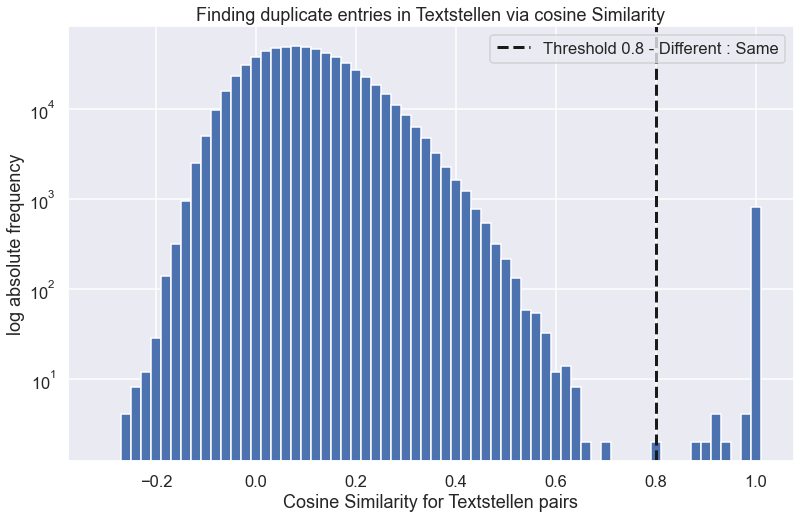

In [16]:
plt.figure(figsize=(13, 8))
plt.hist(M.reshape(-1),
         bins=np.arange(-0.32, 1.02, 0.02)+0.01)
plt.yscale("log")
plt.title("Finding duplicate entries in Textstellen via cosine Similarity")
plt.xlabel("Cosine Similarity for Textstellen pairs")
plt.ylabel("log absolute frequency")
plt.axvline(0.8, lw=3, ls="--", c="k", label="Threshold 0.8 - Different : Same");
plt.legend();

In [17]:
np.sum((M.reshape(-1) > 0.8) & (M.reshape(-1) < 1))

14

In [18]:
for idx in range(len(data)):
    
    new_indices = M[idx]
    new_indices = new_indices.argsort()
    new_indices = new_indices[::-1]
    
    for new_idx in new_indices:
        
        # only look at pairs once
        if idx >= new_idx:
            continue
            
        # once the entries are no longer similar, continue
        if M[idx, new_idx] < 0.8:
            continue
            
        print("TEXTSTELLE:")
        print(data.loc[idx, "Textstelle"])
        print("ÄHNLICHE TEXTSTELLEN:")

        print(M[idx, new_idx].round(3))
        print(data.loc[new_idx, "Textstelle"])
        print(idx, new_idx)

        #if input("\tDOES THIS MATCH?").lower() == "y":
        #    print(idx, new_idx)
        #    print()
        #    break
        print()

TEXTSTELLE:
 Das also war das Menschenmaterial für den zu gründenden Staat:
ÄHNLICHE TEXTSTELLEN:
0.924
 Das also war das Menschenmaterial für den zu gründenden Staat: Menschenfresser.
53 54

TEXTSTELLE:
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die
ÄHNLICHE TEXTSTELLEN:
0.971
 Denn das Leben, sagt Endemann3), muß erst »die Rechtsgedanken verarbeiten, die als Keime in die Paragraphen eingeschlossen sind, damit die beiten, die als Keime in die Paragraphen eingeschlossen sind, damit die Gesetzesbuchstaben lebendig werden.«
75 76

TEXTSTELLE:
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und mehr wie das beste unbewaffnete Auge und der schwächste Mensch kann mit Hilfe
ÄHNLICHE TEXTSTELLEN:
0.885
 Ein Kurzsichtiger sieht mit Brille oder Fernrohr ebenso viel und mehr wie das beste unbewaffnete Auge und der schwä

In [19]:
data.loc[54, ["Metapher", "Kandidat"]] += data.loc[53, ["Metapher", "Kandidat"]]
data.loc[76, ["Metapher", "Kandidat"]] += data.loc[75, ["Metapher", "Kandidat"]]
data.loc[142, ["Metapher", "Kandidat"]] += data.loc[141, ["Metapher", "Kandidat"]]
data.loc[473, ["Metapher", "Kandidat"]] += data.loc[472, ["Metapher", "Kandidat"]]
data.loc[508, ["Metapher", "Kandidat"]] += data.loc[509, ["Metapher", "Kandidat"]]
data.loc[645, ["Metapher", "Kandidat"]] += data.loc[644, ["Metapher", "Kandidat"]]
data.loc[793, ["Metapher", "Kandidat"]] += data.loc[764, ["Metapher", "Kandidat"]]

In [20]:
data.drop([53, 75, 141, 472, 509, 644, 764], inplace=True)
data.drop(columns = "index", inplace=True)
data.reset_index(inplace=True)
data.drop(columns = "index", inplace=True)
data.reset_index(inplace=True)
data

,index,Textstelle,Metapher,Kandidat,Nein,Metapher?,Fokus,Rahmen,Annotator,orig
0,0,"""Der politische Körper verwendet in beiden Fä...",3,1,0,Metapher,"[Zähnen und Krallen, Zähnen und Krallen, nan, ...","[der politische Körper, der politische Körper,...","[B, K, A, GoldStandard]","""Der politische Körper verwendet in beiden Fä..."
1,1,"""Immer noch wird durch die protestantische Le...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Immer noch wird durch die protestantische Le..."
2,2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Kein Zweifel"", schreibt Alb. Schaeffle 1), v..."
3,3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,3,0,Metaphernkandidat,"[nan, Stoffwelt, verzwergt und entkleidet, nan...","[nan, unser praktisches Ideal, nan, nan]","[B, K, A, GoldStandard]","""Mit je weiterem Blick wir die Stoffwelt zu ü..."
4,4,"""Solange das Menschengeschlecht seinen Zerstö...",0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Solange das Menschengeschlecht seinen Zerstö..."
...,...,...,...,...,...,...,...,...,...,...
794,794,verlaufs; sie hat Naturforschung in dem von un...,0,4,0,Metaphernkandidat,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[T, P, B, GoldStandard]",verlaufs; sie hat Naturforschung in dem von un...
795,795,wenn wir uns ein Prinzip denken und auf Grund ...,1,3,0,Metaphernkandidat,"[nan, nan, verstellbare Puppen, nan]","[nan, nan, staatliche Menschenverhältnisse, nan]","[P, K, B, GoldStandard]",wenn wir uns ein Prinzip denken und auf Grund ...
796,796,wenn wir von dem schlechten Worte »Rechtsphilo...,3,1,0,Metapher,"[schwindsüchtig ist, nan, schwindsüchtig, ['sc...","[daß eine Philosophie, nan, eine Philosophie, ...","[P, K, B, GoldStandard]",wenn wir von dem schlechten Worte »Rechtsphilo...
797,797,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,0,NaN,"[nan, nan]","[nan, nan]","[P, B]","»Die Macht, die das Kabinett hat, auf die vers..."


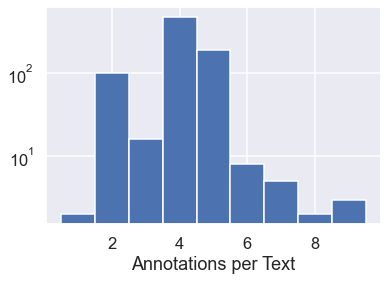

In [21]:
data[["Metapher", "Kandidat"]].sum(axis=1).hist(bins = np.arange(0,10,1)+0.5);
plt.yscale("log")
plt.xlabel("Annotations per Text");

# Now we clean

In [22]:
def eliminate_substring(text, k=22):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

262.3028785982478


/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24190/754124662.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24190/754124662.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24190/754124662.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24190/754124662.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
/var/folders/j4/qmf6qmvd1gv0nctgx3m

240.93241551939926


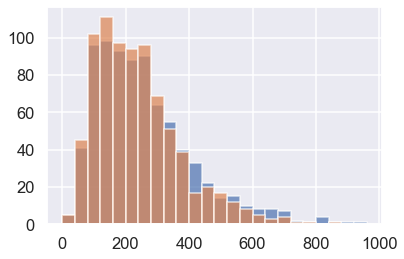

In [23]:
bins = np.arange(0, 1000, 40)

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

#remove quotes
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data["Textstelle"] = data.Textstelle.str.replace("'", '')
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"] = data.Textstelle.str.replace(r'„', '')
data["Textstelle"] = data.Textstelle.str.replace(r'“', '')

# remove linebreak dash
data["Textstelle"] = data.Textstelle.str.replace(r'— ', '')
data["Textstelle"] = data.Textstelle.str.replace(r'- ', '') # linebreak extension

# remove leading/trailing whitespace
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")

#remove digits
data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')

# remove brackets:
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\(', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\)', '')

# remove special characters
# YES, we remove dots. But they need to be added again at the end
#data["Textstelle"] = data.Textstelle.str.replace(r'.', '')
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"] = data.Textstelle.str.replace(r'— ', '')
data["Textstelle"] = data.Textstelle.str.replace(r'—', '')
data["Textstelle"] = data.Textstelle.str.replace(r'- ', '') # linebreak extension
data["Textstelle"] = data.Textstelle.str.replace(r'-', '')
data["Textstelle"] = data.Textstelle.str.replace(r'_', '')

# make sure Commas come after a word:
data["Textstelle"] = data.Textstelle.str.replace(r' ,', ',')

# Roman numerals
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,3}V{0,1}I{0,3} ', "")
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,1}X{1,2}I{0,3} ', "")


data["Kürzungen"] = 0
for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

data.drop("Kürzungen", axis=1, inplace=True)
    
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

In [24]:
cwd = os.getcwd()
folder = "clean+translated-data"
file = "clean-de.csv"
path = "/".join( (cwd, folder, file) )

data = data.set_index("index")
data.to_csv(path)